# **Brain Cancer Gene Expression Classification**

###**Brain** **cancer** is one of the most aggressive and deadly forms of cancer, with a lower survival rate compared to most other cancers. Tumors in the brain vary by type, shape, and location, making diagnosis and treatment complex.  

###Early detection is crucial for improving survival chances, but the subtle nature of initial symptoms makes early diagnosis difficult. Because of these challenges, there is a growing demand for Computer-Aided Diagnosis (CAD) systems using Artificial Intelligence to support doctors in identifying and classifying brain tumors more accurately

#**How Gene Expression is Used for Classification**

**1.	What Gene Expression Means**

Each patient sample (tissue) can be represented by thousands of genes. The expression value tells us how active a gene is. Higher or lower expression levels may indicate disease-specific patterns.

**2.	Why It’s Useful in Brain Cancer**

Brain cancer subtypes (and normal tissue) each have unique gene expression “signatures.” For instance, a gene may be highly expressed in glioblastoma but low in astrocytoma. These differences form a biological fingerprint that can be exploited for classification.

**3.	Turning Biology into Data**

	•	Each sample = one row  
	•	Each gene = one feature (column)
	•	Expression values = numerical features
	•	Label = cancer type (class)

This creates a large table where genes are features, and the cancer type is the label.

**4.	Machine Learning Role**

	•	Training: The model learns patterns of gene activity that distinguish one cancer type from another.
	•	Testing: Given a new gene expression profile, the model predicts the correct cancer subtype.
	•	Methods: Logistic Regression, Random Forests, SVM, Neural Networks, or dimensionality reduction + classification.

# **Goal of the Project**

To develop a machine learning classifier that takes gene expression data as input and outputs the brain cancer subtype. This could contribute to faster, more accurate diagnostics and support precision medicine in oncology.

#**Dataset GSE50161 on brain cancer gene expression from CuMiDa**
## Dataset Description

This project uses the **GSE50161 brain cancer gene expression dataset** from the
**Curated Microarray Database (CuMiDa)**.  

- **Samples:** 130  
- **Genes (features):** 54,676  
- **Classes (labels):** 5  
  - Ependymoma (46 samples)  
  - Glioblastoma (34 samples)  
  - Medulloblastoma (22 samples)  
  - Pilocytic Astrocytoma (15 samples)  
  - Normal Brain Tissue (13 samples)  

CuMiDa is a collection of **78 carefully curated microarray datasets** selected
from more than **30,000 GEO studies**. The database ensures **high-quality preprocessing**
including removal of unwanted probes, background correction, and normalization.  

This dataset is specifically prepared for **machine learning research** in cancer
classification tasks, making it an excellent benchmark for testing feature selection,
class balancing, and predictive modeling techniques in bioinformatics.  

# **Data Loading**

In [1]:
# Import all common libraries
# Data handling
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# Statistics
import scipy.stats as stats
# File handling & OS operations
import os
import sys
import glob

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Warnings
import warnings 
warnings.filterwarnings("ignore")
print("✅ All common libraries imported successfully!")

✅ All common libraries imported successfully!


In [2]:
#C:/Users/hp/Downloads/Brain_GSE50161.csv

In [3]:
# Load the dataset
try:
    df = pd.read_csv('C:/Users/hp/Downloads/Brain_GSE50161.csv')
    print("# Data loaded successfully.\n")
except FileNotFoundError:
    print("# Error: Dataset file not found. Please check the file path.")
    exit()


# Data loaded successfully.



# **Data Exploration**

In [4]:
# Show dataset info
print("## Dataset Info:\n")
print(df.info())

# Show first 5 rows
print("## First 5 rows:\n")
print(df.head())

# Show descriptive statistics for numeric features
print("## Descriptive Statistics:\n")
print(df.describe(), "\n")

## Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Columns: 54677 entries, samples to AFFX-TrpnX-M_at
dtypes: float64(54675), int64(1), object(1)
memory usage: 54.2+ MB
None
## First 5 rows:

   samples        type  1007_s_at   1053_at     117_at    121_at  1255_g_at  \
0      834  ependymoma  12.498150  7.604868   6.880934  9.027128   4.176175   
1      835  ependymoma  13.067436  7.998090   7.209076  9.723322   4.826126   
2      836  ependymoma  13.068179  8.573674   8.647684  9.613002   4.396581   
3      837  ependymoma  12.456040  9.098977   6.628784  8.517677   4.154847   
4      838  ependymoma  12.699958  8.800721  11.556188  9.166309   4.165891   

    1294_at   1316_at   1320_at  ...  AFFX-r2-Ec-bioD-3_at  \
0  7.224920  6.085942  6.835999  ...              9.979005   
1  7.539381  6.250962  8.012549  ...             11.924749   
2  7.813101  6.007746  7.178156  ...             12.154405   
3  8.361843  6.596064  6.347285  ...          

# **Data Preprocessing**

In [5]:


# Target column = second column (Tumor_Type)
y = df.iloc[:, 1]

# Features = all columns except 'sample' (first col) and target column (second col)
X = df.drop(columns=[df.columns[0], df.columns[1]])

# Keep only numeric features
X = X.select_dtypes(include=[np.number])

# Save feature names for later use (e.g., feature importance)
feature_names = X.columns

# ===========================================================
# Check for duplicates (excluding target column)
# ===========================================================
duplicate_rows = X.duplicated().sum()
print(f"## Number of duplicate rows in features: {duplicate_rows}")

if duplicate_rows > 0:
    print("⚠️ Duplicates found. Removing them...")
    # Keep the target column in sync
    X = X[~X.duplicated()]
    y = y[X.index]
    print(f"✅ New dataset shape after removing duplicates: {X.shape}\n")
else:
    print("✅ No duplicates found.\n")

# Display initial data dimensions
print(f"## Initial Data Dimensions\nNumber of samples: {X.shape[0]}")
print(f"Number of genes (features): {X.shape[1]}\n")


## Number of duplicate rows in features: 0
✅ No duplicates found.

## Initial Data Dimensions
Number of samples: 130
Number of genes (features): 54675



In [6]:
# ===========================================================
# Check for Missing Values
# ===========================================================
print("## Checking for missing values in the features (numeric columns)...\n")

# Check only numeric features (X) for missing values
missing_counts = X.isnull().sum()
print(missing_counts)

total_missing = missing_counts.sum()
if total_missing == 0:
    print("\n✅ No missing values found in numeric features. You can skip imputation.\n")
else:
    print(f"\n⚠️ Found {total_missing} missing values in numeric features. You should handle them.\n")



## Checking for missing values in the features (numeric columns)...

1007_s_at          0
1053_at            0
117_at             0
121_at             0
1255_g_at          0
                  ..
AFFX-ThrX-5_at     0
AFFX-ThrX-M_at     0
AFFX-TrpnX-3_at    0
AFFX-TrpnX-5_at    0
AFFX-TrpnX-M_at    0
Length: 54675, dtype: int64

✅ No missing values found in numeric features. You can skip imputation.



# **Data Visualization**

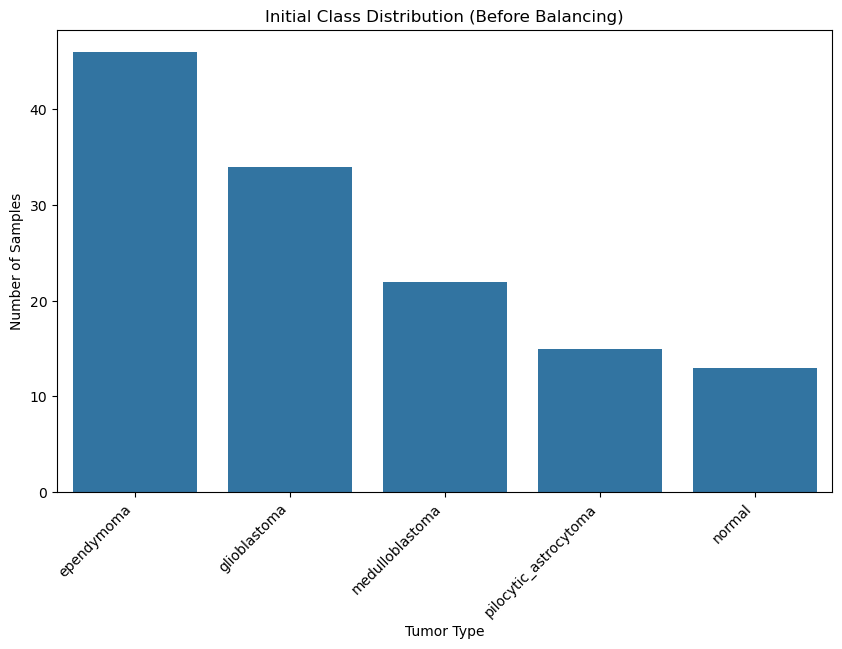

## Target Variable Encoding
Mapping (Number -> Class): {0: 'ependymoma', 1: 'glioblastoma', 2: 'medulloblastoma', 3: 'normal', 4: 'pilocytic_astrocytoma'}

## Train/Test Split Completed
Training samples: 97, Testing samples: 33


In [7]:
# ===========================================================
# Part 3: Data Visualization and Exploratory Analysis (EDA)
# ===========================================================

# Plot initial class distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x=y, order=y.value_counts().index)
plt.title('Initial Class Distribution (Before Balancing)')
plt.xlabel('Tumor Type')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.show()

# Encode target variable for modeling
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("## Target Variable Encoding")
print("Mapping (Number -> Class):", dict(zip(range(len(le.classes_)), le.classes_)))

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded
)
print(f"\n## Train/Test Split Completed")
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


# **Class Balancing**

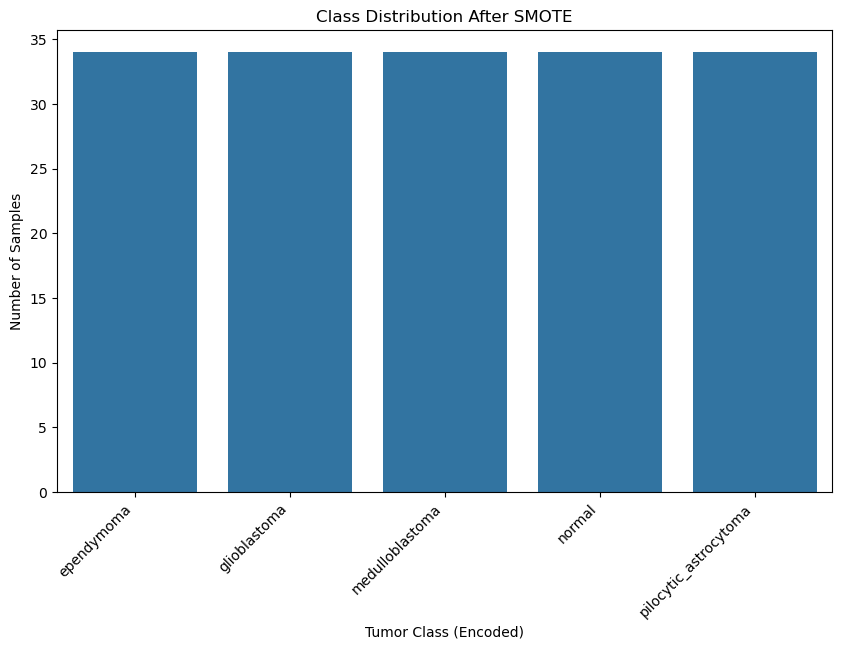


## Data preprocessing, splitting, and balancing complete.



In [8]:
# ===========================================================
# Balance classes in the training set using SMOTE
# ===========================================================
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Plot class distribution after SMOTE
plt.figure(figsize=(10, 6))
sns.countplot(
    x=y_train_balanced,
    order=np.sort(np.unique(y_train_balanced))
)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Tumor Class (Encoded)')
plt.ylabel('Number of Samples')
plt.xticks(
    ticks=np.arange(len(le.classes_)),
    labels=le.classes_,
    rotation=45,
    ha='right'
)
plt.show()

print("\n## Data preprocessing, splitting, and balancing complete.\n")


# **Defining ML Pipelines with Feature Selection and Classifiers**

In [9]:
# Part 4: Building Pipelines for Multiple Models
# Define pipelines for each model
pipelines = {
    'RandomForest': Pipeline([
        ('feature_selection', SelectKBest(score_func=f_classif, k=500)),
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('feature_selection', SelectKBest(score_func=f_classif, k=500)),
        ('classifier', XGBClassifier(random_state=42, eval_metric='mlogloss'))
    ]),
    'SVC': Pipeline([
        ('feature_selection', SelectKBest(score_func=f_classif, k=500)),
        ('scaler', StandardScaler()),
        ('classifier', SVC(random_state=42))
    ])
}

# Define hyperparameter grids for GridSearchCV
param_grids = {
    'RandomForest': {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [None, 5]
    },
    'XGBoost': {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [3, 5]
            },
    'SVC': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    }
}


## Training and tuning RandomForest model...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for RandomForest: {'classifier__max_depth': None, 'classifier__n_estimators': 50}
Best cross-validated score: 0.9882352941176471

## Training and tuning XGBoost model...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for XGBoost: {'classifier__max_depth': 3, 'classifier__n_estimators': 50}
Best cross-validated score: 0.9588235294117646

## Training and tuning SVC model...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for SVC: {'classifier__C': 0.1, 'classifier__kernel': 'linear'}
Best cross-validated score: 0.9882352941176471


--- Final Model Performance Comparison on Test Data ---

### Results for RandomForest:

                       precision    recall  f1-score   support

           ependymoma       1.00      0.83      0.91        12
         glioblastoma       0.80      0.89      0.84         9
      me

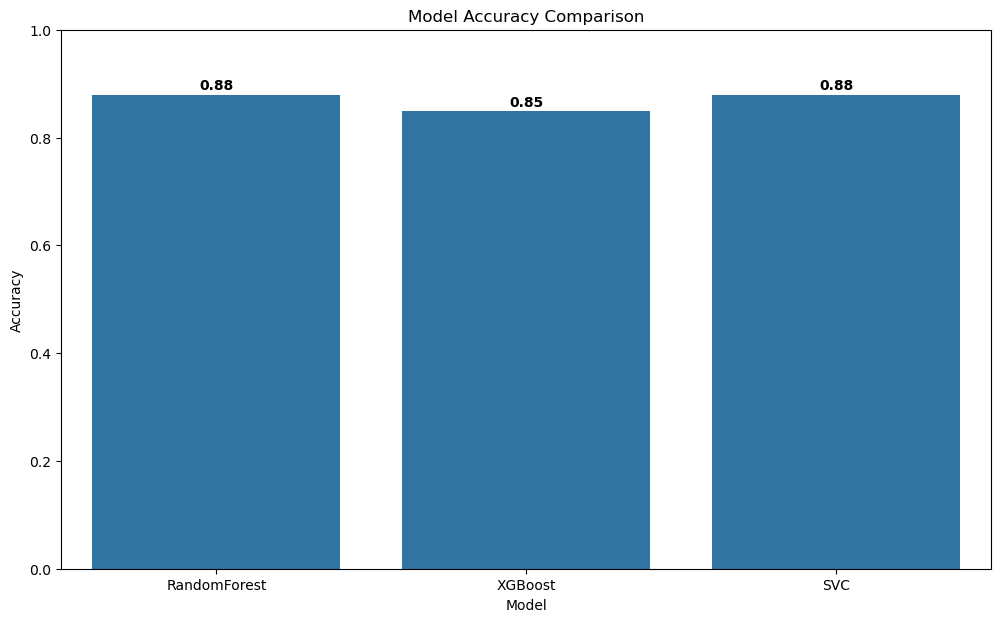

The best performing model is: RandomForest with an accuracy of 0.8788


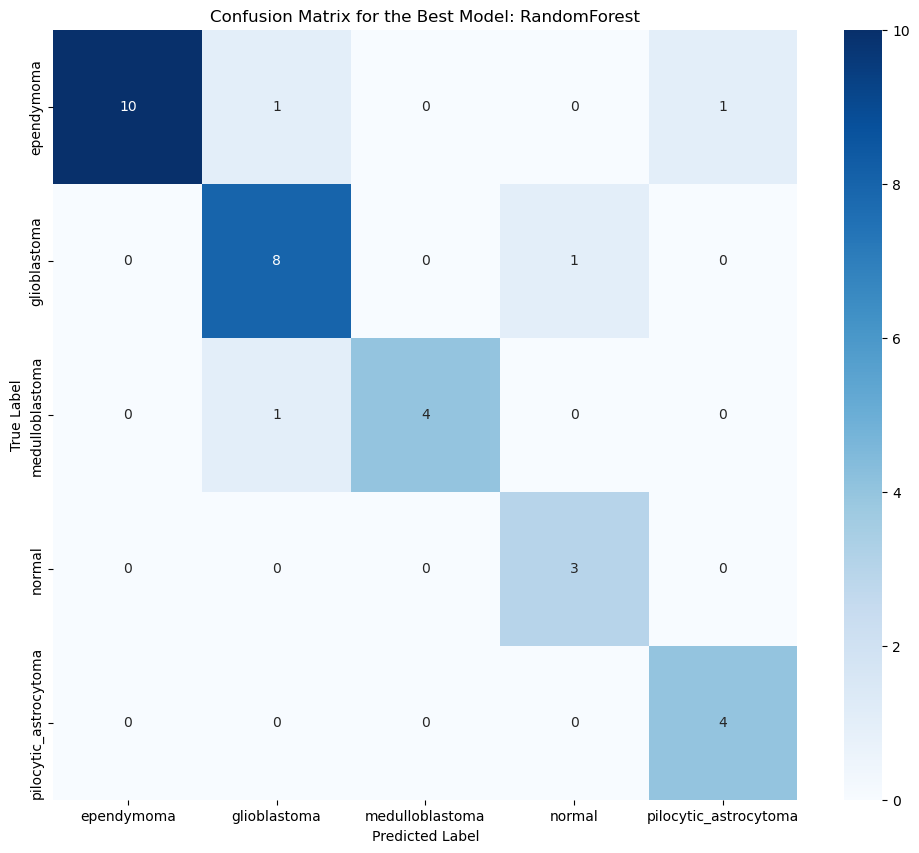

In [10]:
# ===========================================================
# Part 5 & 6: Training, Evaluation, and Visualization
# ===========================================================

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- Part 5: Training & Hyperparameter Tuning ----------

best_models = {}
best_scores = {}

for model_name, pipeline in pipelines.items():
    print(f"## Training and tuning {model_name} model...")

    grid_search = GridSearchCV(
        pipeline,
        param_grids[model_name],
        cv=StratifiedKFold(n_splits=5),
        scoring='accuracy',
        verbose=1
    )

    grid_search.fit(X_train_balanced, y_train_balanced)

    best_models[model_name] = grid_search.best_estimator_
    best_scores[model_name] = grid_search.best_score_

    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validated score: {grid_search.best_score_}\n")


# ---------- Part 6: Final Model Evaluation & Visualization ----------

print("\n--- Final Model Performance Comparison on Test Data ---\n")
final_results = {}

for model_name, best_model in best_models.items():
    # Predict on test set
    y_pred = best_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    final_results[model_name] = accuracy

    # Print detailed classification report
    print(f"### Results for {model_name}:\n")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    print(f"Overall Accuracy: {accuracy:.4f}\n")

# Plot accuracy comparison for all models
plt.figure(figsize=(12, 7))
sns.barplot(x=list(final_results.keys()), y=list(final_results.values()))
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)

# Annotate bars with accuracy values
for i, v in enumerate(final_results.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')

plt.show()

# Identify and report the best performing model
best_performing_model_name = max(final_results, key=final_results.get)
best_model_final = best_models[best_performing_model_name]
print(f"The best performing model is: {best_performing_model_name} "
      f"with an accuracy of {final_results[best_performing_model_name]:.4f}")

# Plot confusion matrix for the best model
y_pred_best = best_model_final.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(12, 10))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.title(f'Confusion Matrix for the Best Model: {best_performing_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


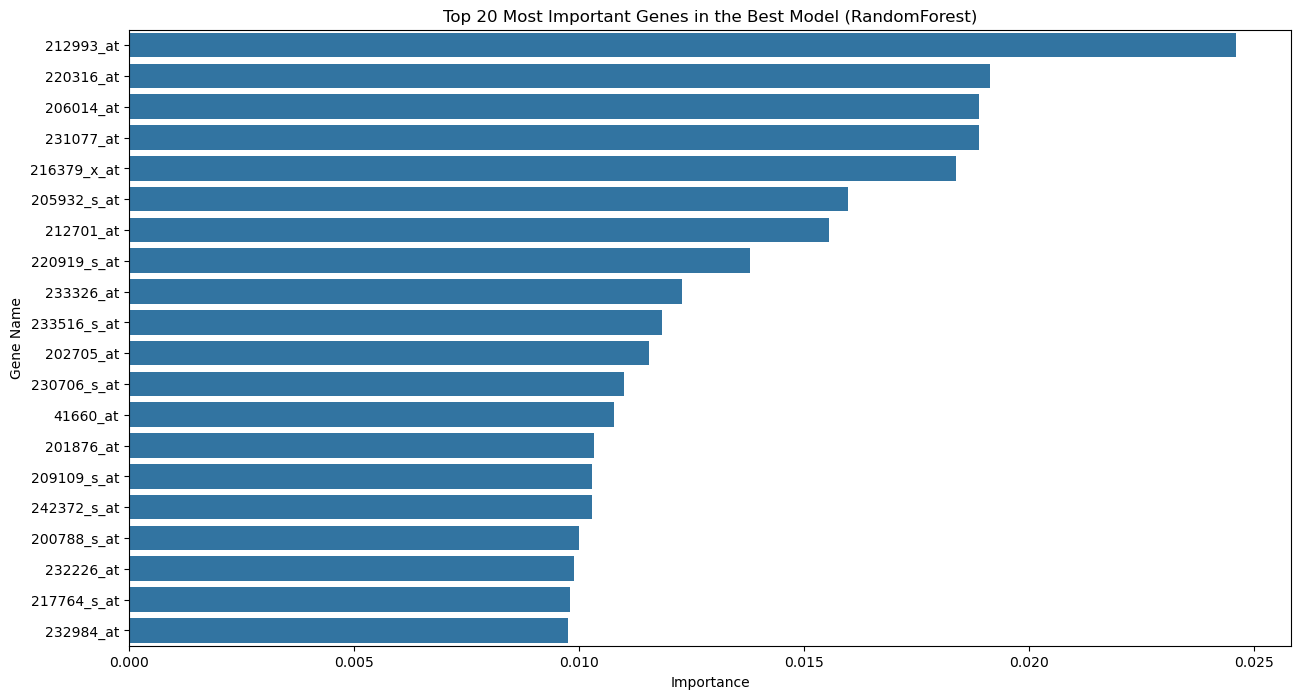


# The project is now complete. Models have been trained, optimized, and evaluated.
The best model is ready to predict new, unseen gene expression data.


In [11]:
# ===========================================================
# Part 7: Feature Importance Plot
# ===========================================================

if best_performing_model_name in ['RandomForest', 'XGBoost']:
    feature_importances = best_model_final.named_steps['classifier'].feature_importances_
    selector = best_model_final.named_steps['feature_selection']

    selected_features_indices = selector.get_support(indices=True)
    selected_feature_names = feature_names[selected_features_indices]

    importance_df = pd.DataFrame({
        'Gene': selected_feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(15, 8))
    sns.barplot(x='Importance', y='Gene', data=importance_df.head(20))
    plt.title(f'Top 20 Most Important Genes in the Best Model ({best_performing_model_name})')
    plt.xlabel('Importance')
    plt.ylabel('Gene Name')
    plt.show()

print("\n# The project is now complete. Models have been trained, optimized, and evaluated.")
print("The best model is ready to predict new, unseen gene expression data.")
